In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


In [22]:
#Loading DataFrame
df = pd.read_csv('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Data/homes.csv')
df.head()


Index(['Sell', ' "List"', ' "Living"', ' "Rooms"', ' "Beds"', ' "Baths"',
       ' "Age"', ' "Acres"', ' "Taxes"'],
      dtype='object')

In [4]:
#Describing data
description = df.describe()
print(description)

             Sell      "List"   "Living"    "Rooms"     "Beds"    "Baths"  \
count   50.000000   50.000000  50.000000  50.000000  50.000000  50.000000   
mean   170.360000  178.340000  21.120000   8.060000   3.820000   1.860000   
std     72.755885   79.382723   8.351072   1.284285   0.690755   0.756199   
min     87.000000   90.000000  10.000000   5.000000   3.000000   1.000000   
25%    135.000000  140.000000  17.000000   7.000000   3.000000   1.000000   
50%    152.000000  160.000000  20.000000   8.000000   4.000000   2.000000   
75%    182.250000  190.000000  22.750000   9.000000   4.000000   2.000000   
max    567.000000  625.000000  64.000000  12.000000   6.000000   4.000000   

            "Age"    "Acres"       "Taxes"  
count   50.000000  50.000000     50.000000  
mean    30.220000   1.020600   3706.100000  
std     30.962314   1.191496   1579.915268  
min      2.000000   0.220000   1445.000000  
25%     12.250000   0.382500   3107.000000  
50%     24.500000   0.550000   3490.

It appears the data frame contains information about the sale of different properties. We can notice a variety of descriptive variables for each property, such as the living area, rooms, beds, baths, age and acres, whilst also variables that are related to the sale of the property, such as Sell price and Taxes. Due to the fact that there are no units provided, it is a bit tricky to understand the particular units of Acres, Living, Bed and baths. Looking into the descriptive statistics of the data, we can observe an innteresting pattern regarding List price and sell price. We can notice that the mean of the List price is typically higher than the average sell price, which could indicate that, on average, owners over-value their property, or perhaps the buyers are very good negotiatiors.  

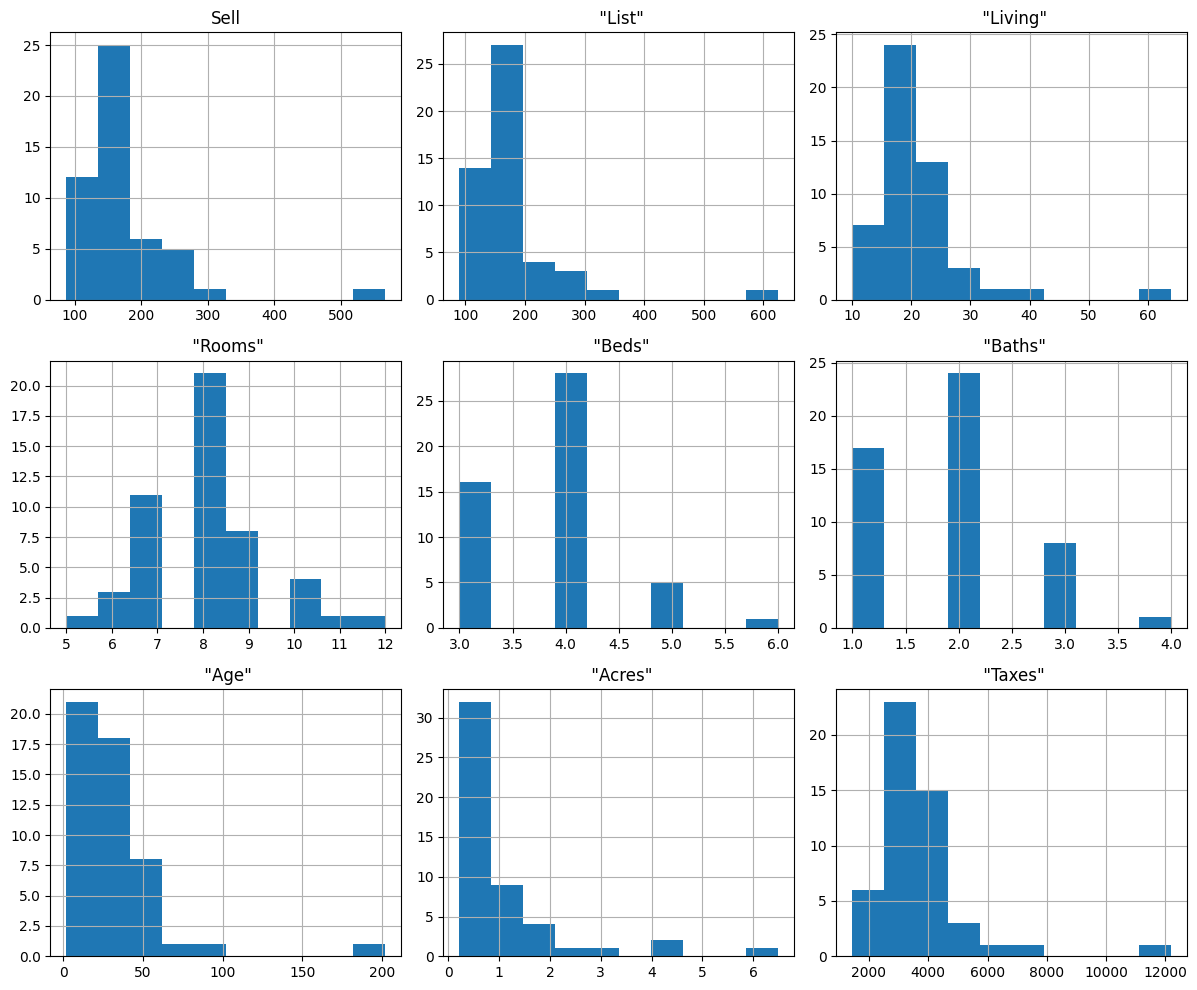

In [5]:
#EDA 1 - Histogram

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


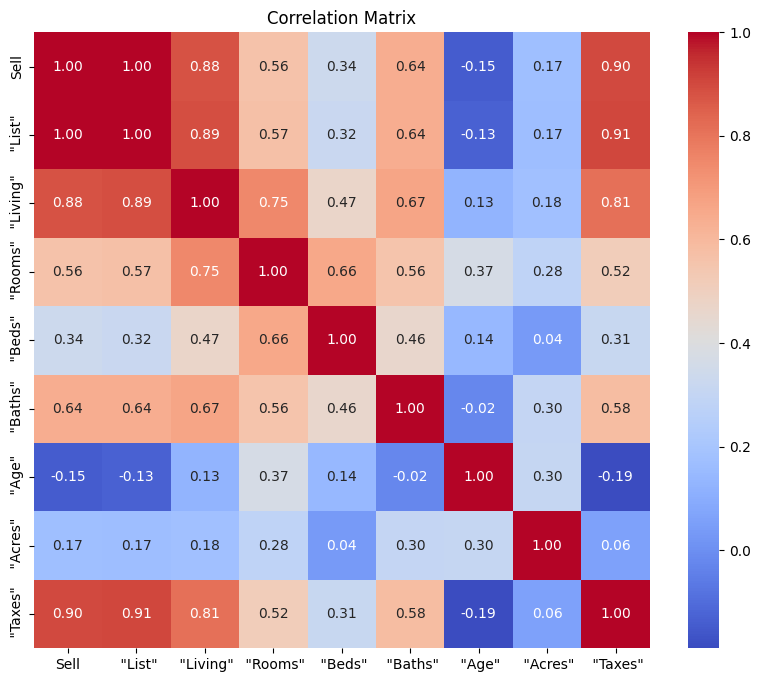

In [12]:
#EDA 2 - Correlation Matrix

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


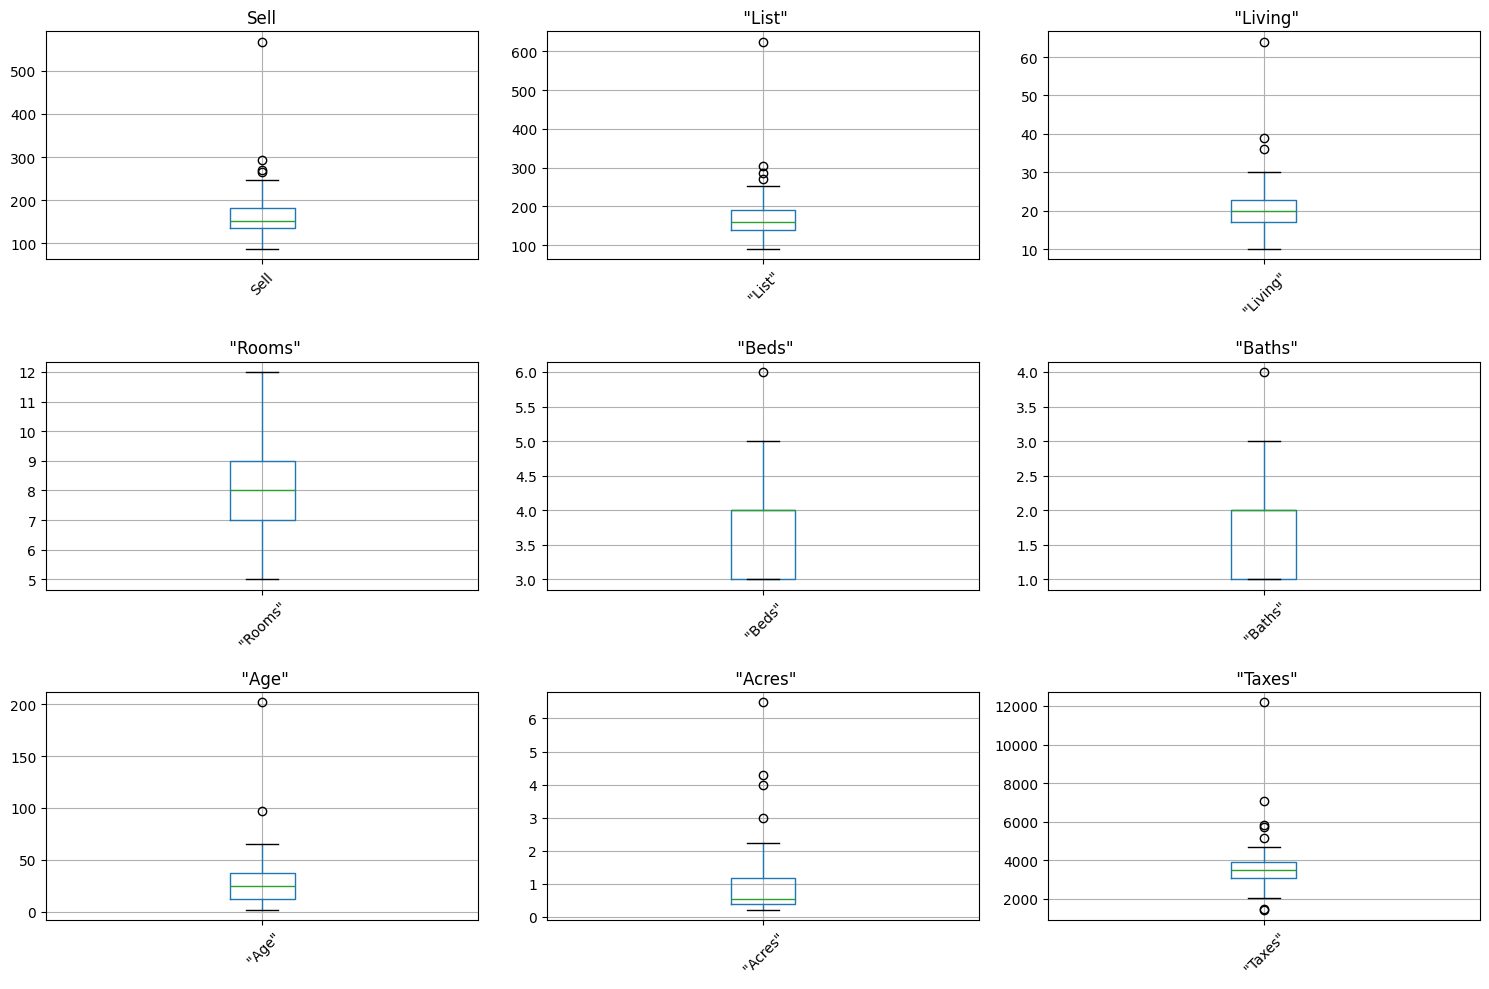

In [9]:
#EDA 3 - Boxplot

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    df.boxplot(column=column)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



The three EDA techniques I've decided to use are: Histogram, Correlation Matrix and Boxplot. 

Histograms allow us to visualize the distribution of numerical data in each column. This helps in understanding the spread and central tendency of the data, identifying any outliers, and detecting potential skewness. As we can see, most of the columns present a right-tail skewness, but others, such as Beds, Rooms, and baths seem to have more normal-looking distributions. I can notice a couple of outliers in some of the variables, specifically in Taxes, list price and sell price.

Correlation analysis helps in understanding the relationships between different numerical variables. It allows us to identify which variables are positively, negatively, or not correlated with each other. The heatmap visualizes the correlation matrix, with correlations ranging from -1 to 1. Positive correlations are indicated shadess of red colors, negative correlations by shades of blue colors. We can identify which features have the strongest relationships, which could be useful for feature selection or understanding dependencies within the dataset. As we can see, it seems that List price and sell price are very highly positively correlated, as well as Taxes and sell and list price. Some of the variables have negative correlations, such as Taxes and Age. 

Finally, by examining the boxplots, we can identify any outliers present in each numerical column. Outliers are data points that significantly deviate from the majority of the data and can potentially skew statistical analyses. Identifying and understanding outliers is important for data cleaning and preprocessing. We can notice that most of the columns contain outliers, with taxes having the majority of them.

In [23]:
# Linear regression Model
y = df['Sell']
x = sm.add_constant(df[' "Taxes"'])
model = sm.OLS(y, x).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        09:05:21   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

After displaying the results of the model, we can reasonable state that Taxes is a good predictor for Sell price. First, the adjusted R-squared is a very high .805, meaning that the correlation between the variables is very strong. Additionally, the p-value for taxes is near zero, meaning that it is statistically significant when predicting sell price. The coefficient for taxes is 0.04, which means that for a 1 unit increase in taxes, the sell price would increase by .04 units. Finally, we can notice a small standard error of 0.003, which means the estimates are very precise.

In [24]:
#Linear Regression with Acres

X = sm.add_constant(df[' "Acres"']) 
y = df['Sell']
model_acres = sm.OLS(y, X).fit()
print(model_acres.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.406
Date:                Fri, 16 Feb 2024   Prob (F-statistic):              0.242
Time:                        09:12:01   Log-Likelihood:                -284.08
No. Observations:                  50   AIC:                             572.2
Df Residuals:                      48   BIC:                             576.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.8457     13.550     11.797      0.0

Contrary to what I was expecting, it appears that the amount of acres a property has is not a good predictor for its sell price. As we can see, the R-squared is extremely low, suggesting little to no correlation at all, the p value is extremely high at over .24, which makes this variable not statistically significant when predicting sell price, and the standard error also appears to be very high. Overall, the previous model using Taxes as the predictor was signficantly more accurate in predicting the sell price.